In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator


In [2]:
exp_vario_fn = '../data/boreholes-processed/LBW_extended_STRATA_LOG_classified_semi_vario_pct.npz'

stats_fn = '../data/models-age-facies/stats_05b_100_calib_reals.csv' #'../data/models-age-facies/stats_100_calib_reals.csv'
stat2_fn = '../data/models-age-facies/stats_1_real_100subsamples.csv'


figDir = '../figures/'

aspectr = 1.0
scilim_x = 5
scilim_y = 6

figsize = (15/2.54,9/2.54) # figure size in inches
fontsize = 8 # font size

In [3]:
npzfile = np.load(exp_vario_fn)
for var in sorted(npzfile.files):
    globals()[var] = npzfile[var]

print(sorted(npzfile.files))

['gamma2clay', 'gamma2inte', 'gamma2sand', 'gamma_clay', 'gamma_inte', 'gamma_sand', 'lag2clay', 'lag2inte', 'lag2sand', 'lag_clay', 'lag_inte', 'lag_sand', 'npp2clay', 'npp2inte', 'npp2sand', 'npp_clay', 'npp_inte', 'npp_sand', 'trend_clay_pct', 'trend_inte_pct', 'trend_max', 'trend_min', 'trend_sand_pct', 'xmax', 'xmin', 'ymax', 'ymin']


In [4]:
if figsize is None: figsize = (15/2.54,8/2.54)
if fontsize is None: fontsize = 5

plt.rc("axes", linewidth=0.5) # so lines on edges of plots aren't too thick
plt.matplotlib.rc('font', **{'sans-serif' : 'Arial','family' : 'sans-serif'}) # so that Arial is used
plt.rcParams.update({'font.size': fontsize})    # size 10 font


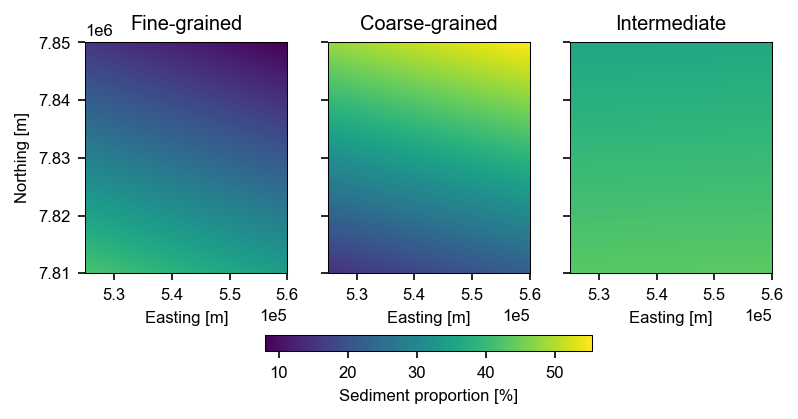

In [5]:
figFileName = figDir+'appendix_a.png'

fig,ax = plt.subplots(1,3,dpi=150,sharey=True,figsize=figsize)
ax[0].set_title('Fine-grained')
im0=ax[0].imshow(trend_clay_pct, origin='lower', cmap='viridis', extent = [xmin,xmax,ymin,ymax], vmin = trend_min, vmax = trend_max)
ax[0].set_xlim([xmin,xmax])
ax[0].set_ylim([ymin,ymax])
ax[0].set_aspect(aspectr)
ax[0].ticklabel_format(style='sci', axis='x', scilimits=(scilim_x,scilim_x))
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(scilim_y,scilim_y))
ax[0].set_xlabel('Easting [m]')
ax[0].set_ylabel('Northing [m]')
# fig.colorbar(im0,ax=ax[0],orientation='horizontal', fraction=.035)

ax[1].set_title('Coarse-grained')
im1=ax[1].imshow(trend_sand_pct, origin='lower', cmap='viridis', extent = [xmin,xmax,ymin,ymax], vmin = trend_min, vmax = trend_max)
ax[1].set_xlim([xmin,xmax])
ax[1].set_ylim([ymin,ymax])
ax[1].set_aspect(aspectr)
ax[1].ticklabel_format(style='sci', axis='x', scilimits=(scilim_x,scilim_x))
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(scilim_y,scilim_y))
ax[1].set_xlabel('Easting [m]')
# ax[1].set_ylabel('Northing [m]')
# fig.colorbar(im1,ax=ax[1],orientation='horizontal', fraction=.035)

ax[2].set_title('Intermediate')
im2=ax[2].imshow(trend_inte_pct, origin='lower', cmap='viridis', extent = [xmin,xmax,ymin,ymax], vmin = trend_min, vmax = trend_max)
ax[2].set_xlim([xmin,xmax])
ax[2].set_ylim([ymin,ymax])
ax[2].set_aspect(aspectr)
ax[2].ticklabel_format(style='sci', axis='x', scilimits=(scilim_x,scilim_x))
ax[2].ticklabel_format(style='sci', axis='y', scilimits=(scilim_y,scilim_y))
ax[2].set_xlabel('Easting [m]')
# ax[2].set_ylabel('Northing [m]')
# fig.colorbar(im2,ax=ax[2],orientation='horizontal', fraction=.035)

#fig.suptitle('Spatial distribution of sediment proportions')
fig.colorbar(im0,ax=ax, orientation='horizontal', fraction=.04,label='Sediment proportion [%]') #images[0], 

plt.savefig(figFileName,bbox_inches='tight')
plt.show()

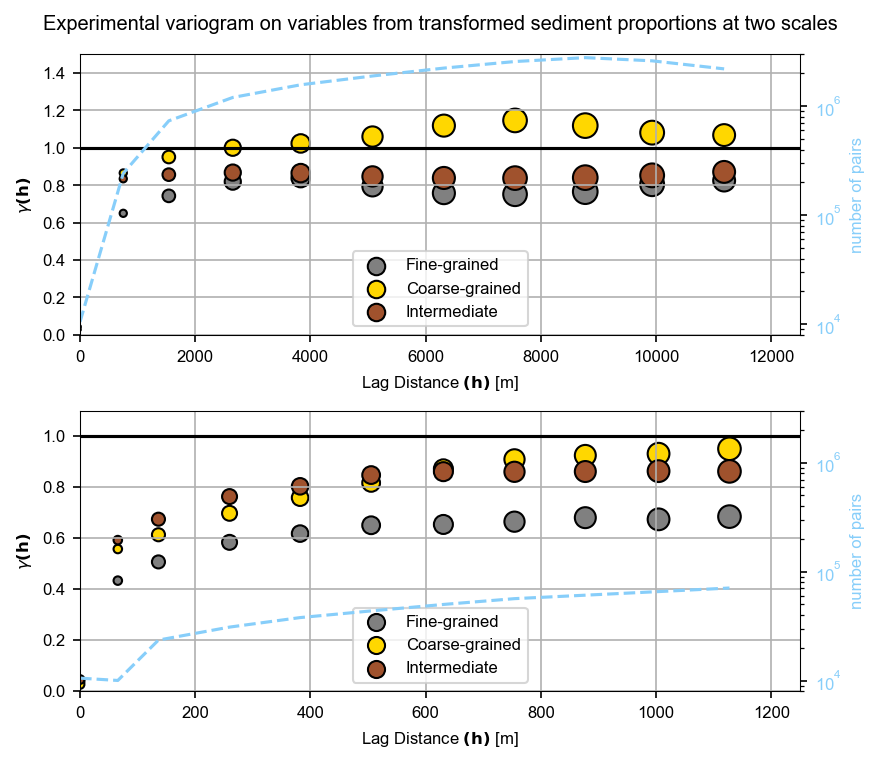

In [6]:
figFileName = figDir+'appendix_b.png'

lag_nb = 10
dmax = ((xmax-xmin)+(ymax-ymin))/6
lag_width = dmax/lag_nb

lag2width = lag_width/10

fig, ax = plt.subplots(2,1,dpi=150,figsize=(15/2.54,13/2.54))
ax[0].scatter(lag_clay[:-1],gamma_clay[:-1],edgecolor='black', color = 'grey',label = 'Fine-grained', marker='o', s = npp_clay[:-1]/2E4)
ax[0].scatter(lag_sand[:-1],gamma_sand[:-1],edgecolor='black', color = 'gold',label = 'Coarse-grained', marker='o', s = npp_sand[:-1]/2E4)
ax[0].scatter(lag_inte[:-1],gamma_inte[:-1],edgecolor='black', color = 'sienna',label = 'Intermediate', marker='o', s = npp_inte[:-1]/2E4)
ax[0].plot([0,lag_width*lag_nb],[1.0,1.0],color = 'black')
ax[0].set_xlabel(r'Lag Distance $\bf(h)$ [m]')
ax[0].set_ylabel(r'$\gamma \bf(h)$')
# ax[0].set_title('Large scale experimental variogram on detrended\nand Gaussian transformed proportions')
ax[0].set_xlim([0,lag_width*lag_nb])
ax[0].set_ylim([0,1.5])
ax[0].legend(loc='lower center')
ax[0].grid(True)

ax2 = ax[0].twinx()  # instantiate a second Axes that shares the same x-axis

ax2.set_ylabel('number of pairs',color = 'lightskyblue')  # we already handled the x-label with ax1
ax2.plot(lag_clay[:-1],npp_clay[:-1], '--',color = 'lightskyblue')
ax2.tick_params(axis='y',labelcolor = 'lightskyblue')
ax2.set_ylim([8E3,3E6])
ax2.set_yscale('log')

ax[1].scatter(lag2clay[:-1],gamma2clay[:-1],edgecolor='black', color = 'grey',label = 'Fine-grained', marker='o', s = npp2clay[:-1]/6E2)
ax[1].scatter(lag2sand[:-1],gamma2sand[:-1],edgecolor='black', color = 'gold',label = 'Coarse-grained', marker='o', s = npp2sand[:-1]/6E2)
ax[1].scatter(lag2inte[:-1],gamma2inte[:-1],edgecolor='black', color = 'sienna',label = 'Intermediate', marker='o', s = npp2inte[:-1]/6E2)
ax[1].plot([0,lag2width*lag_nb],[1.0,1.0],color = 'black')
ax[1].set_xlabel(r'Lag Distance $\bf(h)$ [m]')
ax[1].set_ylabel(r'$\gamma \bf(h)$')
# ax[1].set_title('Small scale experimental variogram on detrended\nand Gaussian transformed proportions')
ax[1].set_xlim([0,lag2width*lag_nb])
ax[1].set_ylim([0,1.1])
ax[1].legend(loc='lower center')
ax[1].grid(True)

ax3 = ax[1].twinx()  # instantiate a second Axes that shares the same x-axis

ax3.set_ylabel('number of pairs',color = 'lightskyblue')  # we already handled the x-label with ax1
ax3.plot(lag2clay[:-1],npp2clay[:-1], '--',color ='lightskyblue')
ax3.tick_params(axis='y',labelcolor = 'lightskyblue')
ax3.set_ylim([8E3,3E6])
ax3.set_yscale('log')

fig.suptitle('Experimental variogram on variables from transformed sediment proportions at two scales')

fig.tight_layout() 
plt.savefig(figFileName,bbox_inches='tight')
plt.show()

In [7]:
df_stats_errors = pd.read_csv(stats_fn)
df_stats_errors

err_prop_clay  err_prop_sand  err_ecdf_clay  err_ecdf_sand  dist2ref  \
0       -0.000463      -0.000099       0.025840       0.040400  0.016851   
1       -0.015463      -0.004399       0.054026       0.037930  0.028146   
2        0.025137       0.057901       0.038688       0.031256  0.038325   
3       -0.004163       0.028601       0.032730       0.032885  0.024667   
4       -0.025763      -0.054999       0.039444       0.074300  0.048799   
..            ...            ...            ...            ...       ...   
95      -0.009363      -0.020299       0.055630       0.048049  0.033524   
96      -0.027063       0.019501       0.047382       0.036979  0.032788   
97      -0.035663      -0.019699       0.053188       0.042223  0.037770   
98      -0.006363       0.028501       0.059208       0.034097  0.032225   
99      -0.043363       0.048201       0.053223       0.029956  0.043725   

    similarity  
0     0.983149  
1     0.971854  
2     0.961675  
3     0.975333  
4     0.951201  
..         ...  
95    0.966476  
96    0.967212  
97    0.962230  
98    0.967775  
99    0.956275  

[100 rows x 6 columns]

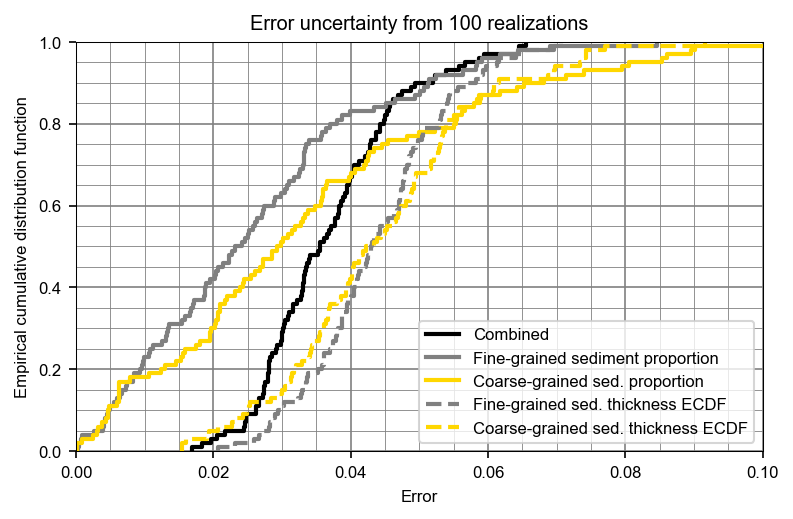

In [11]:
figFileName = figDir+'appendix_c.png'

fig, ax = plt.subplots(1,1,dpi=150,figsize=figsize)
ax.ecdf(np.abs(df_stats_errors["dist2ref"].values.astype('float')),lw=2,color='black',label = 'Combined')
ax.ecdf(np.abs(df_stats_errors["err_prop_clay"].values.astype('float')),ls='-',lw=2, color='grey',label = 'Fine-grained sediment proportion')
ax.ecdf(np.abs(df_stats_errors["err_prop_sand"].values.astype('float')),ls='-',lw=2, color='gold',label = 'Coarse-grained sed. proportion')

ax.ecdf(np.abs(df_stats_errors["err_ecdf_clay"].values.astype('float')),ls='--',lw=2,color='grey',label = 'Fine-grained sed. thickness ECDF')
ax.ecdf(np.abs(df_stats_errors["err_ecdf_sand"].values.astype('float')),ls='--',lw=2,color='gold',label = 'Coarse-grained sed. thickness ECDF')

ax.set_xlim([0,0.10])

ax.set_xlabel("Error")
ax.set_ylabel("Empirical cumulative distribution function")

ax.grid(True)
# Style the grid.
ax.grid(which='major', color='gray', linewidth=0.8)
ax.grid(which='minor', color='gray', linewidth=0.4)
# Show the minor ticks and grid.
ax.minorticks_on()
# Now hide the minor ticks (but leave the gridlines).
ax.tick_params(which='minor', bottom=False, left=False)

# Only show minor gridlines once in between major gridlines.
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

plt.legend(loc = 'best')

plt.title('Error uncertainty from 100 realizations')

plt.savefig(figFileName,bbox_inches='tight')
plt.show()

In [9]:
df_stats_smpl_err = pd.read_csv(stat2_fn)
df_stats_smpl_err

err_prop_clay  err_prop_sand  err_ecdf_clay  err_ecdf_sand  dist2ref  \
0       -0.000463      -0.000099       0.025840       0.040400  0.016851   
1       -0.000463      -0.000099       0.028833       0.043330  0.018358   
2       -0.000463      -0.000099       0.027931       0.041356  0.017624   
3       -0.000463      -0.000099       0.020770       0.042999  0.016242   
4       -0.000463      -0.000099       0.026225       0.043332  0.017700   
..            ...            ...            ...            ...       ...   
95      -0.000463      -0.000099       0.025452       0.041087  0.016930   
96      -0.000463      -0.000099       0.024471       0.042005  0.016918   
97      -0.000463      -0.000099       0.026979       0.042658  0.017718   
98      -0.000463      -0.000099       0.026609       0.041834  0.017413   
99      -0.000463      -0.000099       0.025607       0.044536  0.017854   

    similarity  
0     0.983149  
1     0.981642  
2     0.982376  
3     0.983758  
4     0.982300  
..         ...  
95    0.983070  
96    0.983082  
97    0.982282  
98    0.982587  
99    0.982146  

[100 rows x 6 columns]

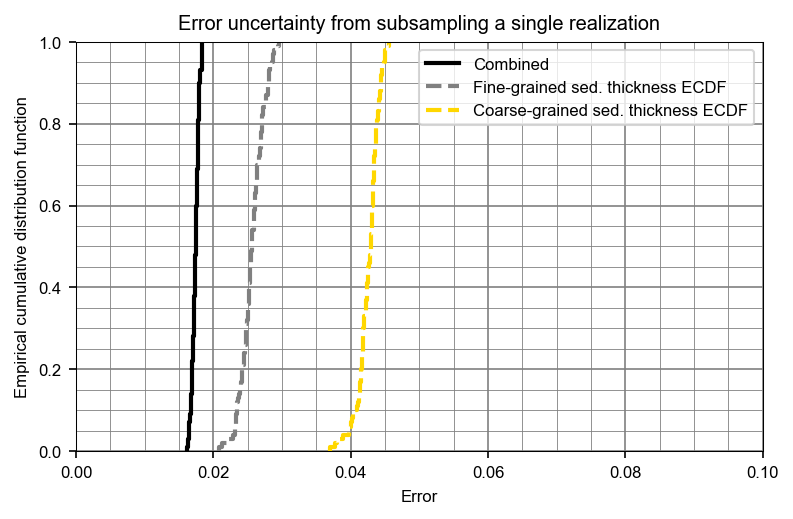

In [12]:
figFileName = figDir+'appendix_d.png'

fig, ax = plt.subplots(1,1,dpi=150,figsize=figsize)
ax.ecdf(np.abs(df_stats_smpl_err["dist2ref"].values.astype('float')),lw=2,color='black',label = 'Combined')
# ax.ecdf(np.abs(df_stats_smpl_err["err_prop_clay"].values.astype('float')),ls='-',lw=2, color='grey',label = 'Fine-grained sediment proportion')
# ax.ecdf(np.abs(df_stats_smpl_err["err_prop_sand"].values.astype('float')),ls='-',lw=2, color='gold',label = 'Coarse-grained sed. proportion')

ax.ecdf(np.abs(df_stats_smpl_err["err_ecdf_clay"].values.astype('float')),ls='--',lw=2,color='grey',label = 'Fine-grained sed. thickness ECDF')
ax.ecdf(np.abs(df_stats_smpl_err["err_ecdf_sand"].values.astype('float')),ls='--',lw=2,color='gold',label = 'Coarse-grained sed. thickness ECDF')

ax.set_xlim([0,0.10])
ax.set_xlabel("Error")
ax.set_ylabel("Empirical cumulative distribution function")

ax.grid(True)
# Style the grid.
ax.grid(which='major', color='gray', linewidth=0.8)
ax.grid(which='minor', color='gray', linewidth=0.4)
# Show the minor ticks and grid.
ax.minorticks_on()
# Now hide the minor ticks (but leave the gridlines).
ax.tick_params(which='minor', bottom=False, left=False)

# Only show minor gridlines once in between major gridlines.
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

plt.legend(loc = 'best')

plt.title('Error uncertainty from subsampling a single realization')

plt.savefig(figFileName,bbox_inches='tight')
plt.show()